#  1) Load the data into the pandas environment and identify some basic details of the dataset

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

emp_data=pd.read_csv(r"C:\Users\Tejes\Downloads\employee.csv")
emp_data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [5]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Allen Smith to Leo Duck
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                7 non-null      float64
 1   income             7 non-null      float64
 2   gender             7 non-null      object 
 3   department         9 non-null      object 
 4   grade              9 non-null      object 
 5   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 504.0+ bytes


In [6]:
emp_data.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [12]:
emp_data.shape

(9, 6)

# 2) Rest the index as 'name'

In [74]:
emp_data=pd.read_csv(r"C:\Users\Tejes\Downloads\employee.csv", index_col='name')
emp_data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


#  3) Select rows for specific names Jack Morgan and Josh Wills

In [76]:
emp_data.loc[['Josh Wills','James Authur']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Josh Wills,54.0,52000.0,F,Finance,G3,901
James Authur,54.0,NaN,F,Operations,G3,53


# 4) Select data for multiple values ' Sales ' and ' Finance '

In [28]:
emp_data[emp_data['department'].isin(['Sales','Finance'])]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 5 ) Display employee who has more than 700

In [32]:
emp_data[emp_data['performance_score']>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 6) Display employee who has more than 500 and less than 700 performance score

In [37]:
emp_data[(emp_data['performance_score']>500) &(emp_data['performance_score']<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# 7) Check and handle missing values in the dataset

In [41]:
emp_data.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'income'}>]], dtype=object)

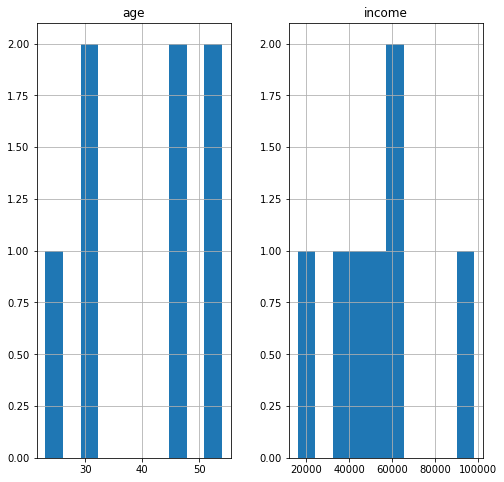

In [44]:
continuous_data=emp_data[['age','income']]
continuous_data.hist(figsize=(8,8))

In [47]:
emp_data['age']=emp_data['age'].fillna(emp_data['age'].median())
emp_data['income']=emp_data['income'].fillna(emp_data['income'].median())
emp_data['gender']=emp_data['gender'].fillna(emp_data['gender'].mode().loc[0])
emp_data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 8) Check  the outliers and handle ouliers in performance score percentile

Text(0.5, 1.0, 'Check for the Outliers')

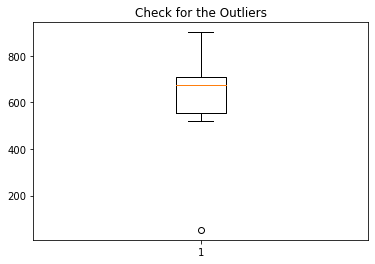

In [49]:
plt.boxplot(emp_data['performance_score'])
plt.title('Check for the Outliers')

In [50]:
Q1=np.percentile(emp_data['performance_score'],25, interpolation='midpoint')
Q2=np.percentile(emp_data['performance_score'],50, interpolation='midpoint')
Q3=np.percentile(emp_data['performance_score'],75, interpolation='midpoint')

IQR=Q3-Q1

low_lim = Q1-1.5*IQR
up_lim = Q3+ 1.5*IQR

print(low_lim)
print(up_lim)

323.5
943.5


In [51]:
outlier=[]
for i in emp_data['performance_score']:
    if((i<low_lim)or(i>up_lim)):
        outlier.append(i)
        

In [52]:
outlier

[53]

In [53]:
ind=emp_data['performance_score']<low_lim
emp_data.loc[ind].index

Index(['James Authur'], dtype='object', name='name')

In [57]:
emp_data.drop(['James Authur'],inplace=True)

Text(0.5, 1.0, 'Box plot of performance_score')

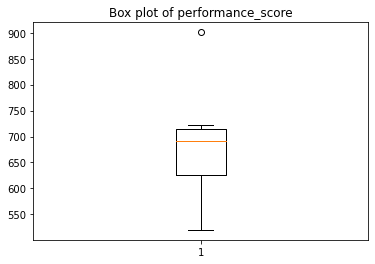

In [58]:
plt.boxplot(emp_data['performance_score'])
plt.title('Box plot of performance_score')

# 9) Check the gender column and do Dummy encoding

In [59]:
new_emp_data=pd.get_dummies(emp_data, columns=['gender'])

In [60]:
new_emp_data

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.0,52000.0,Operations,G3,723,1,0
S Kumar,45.0,16000.0,Finance,G0,520,1,0
Jack Morgan,32.0,35000.0,Finance,G2,674,0,1
Ying Chin,45.0,65000.0,Sales,G3,556,1,0
Dheeraj Patel,30.0,42000.0,Operations,G2,711,1,0
Satyam Sharma,45.0,62000.0,Sales,G3,649,1,0
Josh Wills,54.0,52000.0,Finance,G3,901,1,0
Leo Duck,23.0,98000.0,Sales,G4,709,0,1


# 10) Do the Standard Scaling on the feature performance score

In [61]:
from sklearn import preprocessing

In [62]:
x=pd.DataFrame(emp_data['performance_score'])

In [66]:
Standardisation = preprocessing.StandardScaler()
x=Standardisation.fit_transform(x)
x=pd.DataFrame(x)
x.describe()

,0
count,8.000000e+00
mean,4.857226e-17
std,1.069045e+00
min,-1.475872e+00
25%,-5.026938e-01
50%,1.023793e-01
75%,3.094385e-01
max,2.030331e+00
